In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.losses import CategoricalCrossentropy as ccEnLo
#from tensorflow.keras.metrics import CategoricalCrossentropy as ccEnMe

from tensorflow.keras import backend as K

import scipy

(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

In [2]:
x_train = xtrain.reshape(60000, 28, 28, 1)/255
x_test = xtest.reshape(10000, 28, 28, 1)/255

y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

In [3]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), input_shape=(28, 28, 1), activation='relu'),  
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), strides=(1, 1),activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='relu'),
    Dense(10, activation='softmax')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                80050     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0

In [5]:
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
h = model.fit(x_train, y_train, epochs=15, batch_size=200, validation_split=0.2, use_multiprocessing = True)

Epoch 1/15
240/240 [==============================] - 24s 97ms/step - loss: 1.4360 - accuracy: 0.4756 - val_loss: 0.5635 - val_accuracy: 0.7778
Epoch 2/15
240/240 [==============================] - 21s 88ms/step - loss: 0.6927 - accuracy: 0.7388 - val_loss: 0.4691 - val_accuracy: 0.8209
Epoch 3/15
240/240 [==============================] - 22s 91ms/step - loss: 0.5929 - accuracy: 0.7757 - val_loss: 0.4314 - val_accuracy: 0.8328
Epoch 4/15
240/240 [==============================] - 23s 97ms/step - loss: 0.5514 - accuracy: 0.7957 - val_loss: 0.3959 - val_accuracy: 0.8543
Epoch 5/15
240/240 [==============================] - 24s 100ms/step - loss: 0.5046 - accuracy: 0.8116 - val_loss: 0.3700 - val_accuracy: 0.8675
Epoch 6/15
240/240 [==============================] - 28s 116ms/step - loss: 0.4777 - accuracy: 0.8239 - val_loss: 0.3479 - val_accuracy: 0.8743
Epoch 7/15
240/240 [==============================] - 24s 99ms/step - loss: 0.4548 - accuracy: 0.8327 - val_loss: 0.3351 - val_accurac

In [7]:
score = model.evaluate(x_train, y_train, batch_size=100)
score

600/600 [==============================] - 11s 18ms/step - loss: 0.2640 - accuracy: 0.8995


[0.26404425501823425, 0.8995333313941956]

<Figure size 1080x720 with 0 Axes>

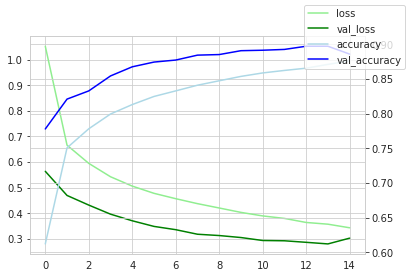

In [8]:
plt.figure(figsize=(15,10))

fig, ax1 = plt.subplots()
ax1.plot(h.history['loss'], color="lightgreen", label="loss") 
ax1.plot(h.history['val_loss'], color="green", label="val_loss") 
ax2 = ax1.twinx()
ax2.plot(h.history['accuracy'], color="lightblue", label='accuracy') 
ax2.plot(h.history['val_accuracy'], color="blue", label='val_accuracy') 
fig.legend()

In [9]:
test_set_score = model.evaluate(x_test, y_test, verbose=1)
print("Test set loss:", test_set_score[0])
print("Test set accuracy:", test_set_score[1])

313/313 [==============================] - 8s 26ms/step - loss: 0.3187 - accuracy: 0.8814
Test set loss: 0.3187229335308075
Test set accuracy: 0.8813999891281128
